## Candidate_Selection_for_Interview

In this project I have used LogisticRegression for predicting the candidate is elgible for interview based on candidate's work experience and German Language level completed.I will use this model for complete deployment process. Therfore By the end of this project I have used Joblib to save this model in serialobject format

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Preparing Dataframe 

In [2]:
df = pd.read_excel('selectiondata.xlsx')

In [3]:
df.head()

,Gender,Salary_Claim,German_level,Work_Experience,Interested_In_Travelling,Degree,Marital_Status,Eligibility
0,Male,36879,6,8,Yes,B.Sc.,Single,Yes
1,Male,48912,6,24,Yes,B.Sc.,Single,Yes
2,Male,38863,5,25,No,M.Sc.,Married,Yes
3,Male,30196,4,2,Yes,Other,Single,Yes
4,Female,45130,6,17,No,M.Sc.,Married,No


In [385]:
df.head()

,Gender,Salary_Claim,German_level,Work_Experience,Interested_In_Travelling,Degree,Marital_Status,Eligibility
0,1,36879,6,8,1,2,1,1
1,1,48912,6,24,1,2,1,1
2,1,38863,5,25,0,6,0,1
3,1,30196,4,2,1,10,1,1
4,0,45130,6,17,0,6,0,0


## 3. Exploratory visualization and cleaning

**3.1 Checking the dataset for any null value**

In [4]:
df.isnull().sum()

Gender                      0
Salary_Claim                0
German_level                0
Work_Experience             0
Interested_In_Travelling    0
Degree                      0
Marital_Status              0
Eligibility                 0
dtype: int64

Dataset has no Null Values. It is comlete

In [5]:
from sklearn.preprocessing import LabelEncoder
labling = LabelEncoder()

In [6]:
String_Columns = ['Gender','Interested_In_Travelling','Degree','Marital_Status','Eligibility']
for i in String_Columns:df[i] = labling.fit_transform(df[i])

In [7]:
df.head()

,Gender,Salary_Claim,German_level,Work_Experience,Interested_In_Travelling,Degree,Marital_Status,Eligibility
0,1,36879,6,8,1,2,1,1
1,1,48912,6,24,1,2,1,1
2,1,38863,5,25,0,6,0,1
3,1,30196,4,2,1,10,1,1
4,0,45130,6,17,0,6,0,0


**3.2 Observing correlation between independent and dependent variables**


<AxesSubplot:>

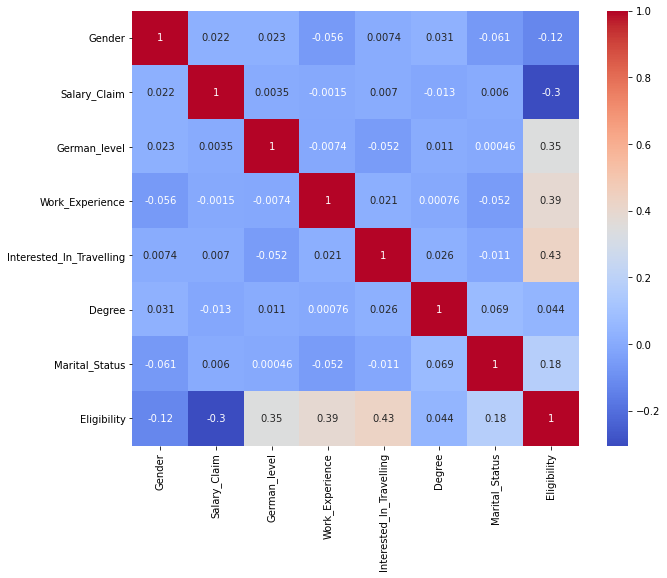

In [315]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

**Observation**: 
1. Independent variables don't have any strong correlation with each other.
2. Dependent variable has strong relation with some variables such as "German Level","Work Experience","Interest in travelling" 

**3.3 Distributing Dataset in the form of dependent and Independent variables**

In [8]:
y = df['Eligibility'] # Dependent Variable
X = df.drop('Eligibility',axis=1) # Independent Variables

**3.4 Checking the data for imbalance based on Target Feature 'Decision**

In [9]:
y.value_counts()


0    640
1    470
Name: Eligibility, dtype: int64

In [10]:
#from sklearn.preprocessing import MinMaxScaler
#scalling = MinMaxScaler()


In [11]:
#for columns in X.columns:
    #X[columns] = scalling.fit_transform(X[[columns]])

In [12]:
X.head()

,Gender,Salary_Claim,German_level,Work_Experience,Interested_In_Travelling,Degree,Marital_Status
0,1,36879,6,8,1,2,1
1,1,48912,6,24,1,2,1
2,1,38863,5,25,0,6,0
3,1,30196,4,2,1,10,1
4,0,45130,6,17,0,6,0


## 4. Model Training and Prediction

**4.1 Creating Training and testing dataset**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


**4.2 Impoering LogisticRegression algorithm**

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


**4.3 Fitting the model and predicting the values for test dataset** 

In [15]:
model.fit(X_train,y_train)

y_predict= model.predict(X_test)


## 5. Model Evaluation

**5.1 Importing classification_report, confusion_matrix to predict the accuracy of model**

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

**5.2 Testing Accuracy**

In [17]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[143  39]
 [ 60  91]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       182
           1       0.70      0.60      0.65       151

    accuracy                           0.70       333
   macro avg       0.70      0.69      0.70       333
weighted avg       0.70      0.70      0.70       333



In [358]:
X_test

,Gender,Salary_Claim,German_level,Work_Experience,Interested_In_Travelling,Degree,Marital_Status
132,0.0,0.311414,0.8,0.551724,1.0,0.2,0.0
846,1.0,0.561274,1.0,0.000000,1.0,0.9,1.0
348,0.0,0.571160,0.4,0.931034,1.0,0.0,0.0
689,1.0,0.304891,0.6,0.965517,1.0,0.1,0.0
858,1.0,0.510286,0.2,0.482759,1.0,0.7,1.0
...,...,...,...,...,...,...,...
204,1.0,0.204354,1.0,0.517241,1.0,1.0,0.0
238,1.0,0.857520,0.8,0.586207,0.0,0.0,1.0
6,0.0,0.095373,0.4,0.034483,0.0,0.5,1.0
1074,1.0,0.093372,0.0,0.586207,0.0,0.9,0.0


In [359]:
y_test

132     1
846     1
348     1
689     1
858     0
       ..
204     1
238     0
6       0
1074    0
482     0
Name: Eligibility, Length: 333, dtype: int32

In [18]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier(n_estimators=300)

In [19]:
Rmodel.fit(X_train,y_train)

Ry_predict= Rmodel.predict(X_test)


In [20]:
print(confusion_matrix(y_test,Ry_predict))
print(classification_report(y_test,Ry_predict))

[[178   4]
 [ 16 135]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       182
           1       0.97      0.89      0.93       151

    accuracy                           0.94       333
   macro avg       0.94      0.94      0.94       333
weighted avg       0.94      0.94      0.94       333



## 6. Predictions for External Inputs

In [375]:
y_test

132     1
846     1
348     1
689     1
858     0
       ..
204     1
238     0
6       0
1074    0
482     0
Name: Eligibility, Length: 333, dtype: int32

In [374]:
X_test

,Gender,Salary_Claim,German_level,Work_Experience,Interested_In_Travelling,Degree,Marital_Status
132,0,37793,5,17,1,2,0
846,1,44036,6,1,1,9,1
348,0,44283,3,28,1,0,0
689,1,37630,4,29,1,1,0
858,1,42762,2,15,1,7,1
...,...,...,...,...,...,...,...
204,1,35118,6,16,1,10,0
238,1,51438,5,18,0,0,1
6,0,32395,3,2,0,5,1
1074,1,32345,1,18,0,9,0


In [21]:
#'Gender', 'Salary_Claim', 'German_level', 'Work_Experience','Interested_In_Travelling', 'Degree', 'Marital_Status'

u = Rmodel.predict([[0,37793,5,17,1,2,0]])

if u ==1 : 
    print("candidate is eligible for interview")
    
else:
    print("candidate is not eligible for interview")
    

candidate is eligible for interview


In [22]:
#'Gender', 'Salary_Claim', 'German_level', 'Work_Experience','Interested_In_Travelling', 'Degree', 'Marital_Status'

m = Rmodel.predict([[1,37260,5,5,0,7,1]])

if m ==1 : 
    print("candidate is eligible for interview")
    
else:
    print("candidate is not eligible for interview")
    

candidate is not eligible for interview


## 7.Saving the model

**7.1 Importing joblib to save the model**

In [23]:
import joblib

**7.2 Dumping the model in Candidate_Selection file**

In [24]:
joblib.dump(Rmodel,'Candidate_SelectionV6')

['Candidate_SelectionV6']

**7.3 Loading the Candidate_Selection file for new predictions**

In [25]:
selection_model=joblib.load('Candidate_SelectionV6')

**7.4 Predicting the Interview Eligibility for candidate with 7 Years work experience and German language level 5 (C1)**

In [26]:
#'Gender', 'Salary_Claim', 'German_level', 'Work_Experience','Interested_In_Travelling', 'Degree', 'Marital_Status'
c= selection_model.predict([[1,55000,1,1,0,6,0]])
if c == 1 : 
    print("candidate is eligible for interview")
    
else:
    print("candidate is not eligible for interview")


candidate is not eligible for interview


In [27]:
x= selection_model.predict([[1,38000,5,10,1,1,1]])
if x == 1 : 
    print("candidate is eligible for interview")
    
else:
    print("candidate is not eligible for interview")

candidate is eligible for interview
